## Downloading the BoM Rainfall data for Christmas Island
- taken from the BoM website.


In [40]:
import pysplit as py
import numpy as np
import pickle as pickle
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [41]:
XI_rainfall=pd.read_csv(r'/Volumes/Seagate_Backup/PhD/Results/Christmas Islands/Bom Data/Christmas Island BOM/Daily_Rainfall.csv',
                       usecols=['Year','Month','Day','Rainfall'])
XI_rainfall

,Year,Month,Day,Rainfall
0,1973,1,1,NaN
1,1973,1,2,NaN
2,1973,1,3,NaN
3,1973,1,4,NaN
4,1973,1,5,NaN
5,1973,1,6,NaN
6,1973,1,7,NaN
7,1973,1,8,NaN
8,1973,1,9,NaN
9,1973,1,10,NaN


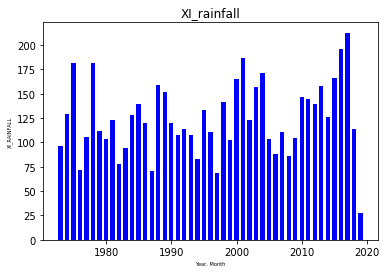

In [38]:
width = 1/1.5
plt.bar(XI_rainfall.Year,XI_rainfall.Rainfall,width,color='blue')
plt.xlabel('Year, Month', fontsize=5)
plt.ylabel('XI_RAINFALL', fontsize=5)
plt.title('XI_rainfall')
plt.show()

In [150]:
date_rng = pd.date_range(start='1/1/1973', end='13/02/2019', freq='D')
XI_rainfall['Date_Range']=date_rng
XI_rainfall_T=pd.DataFrame(XI_rainfall['Date_Range'])
XI_rainfall_T['Rainfall']=XI_rainfall.Rainfall


#trying to convert the date_range to datetime
XI_rainfall_T['Date_Range']= pd.to_datetime(XI_rainfall_T['Date_Range'])
XI_rainfall_T.index=XI_rainfall_T['Date_Range']


## Calculate the Climatology
Using the entire period and obtiaining the monthly means 

In [151]:
# get climatology
ds_XI_rainfall_monthly = XI_rainfall_T.resample('M').sum()

#convert the dataframe - does the same as the top however python likes it more when you only have an index and the valuess
#ds_XI_rainfall_month = XI_rainfall_T.groupby(['Date_Range']).mean()

#caluclating the average rainfall - over the entire period not just the climatological period 
ds_XI_rainfall_month_av = ds_XI_rainfall_monthly.groupby(ds_XI_rainfall_monthly.index.month).mean()
ds_XI_rainfall_month_av

,Rainfall
Date_Range,
1,283.561702
2,326.976596
3,299.056522
4,231.084783
5,179.017391
6,170.906522
7,94.576087
8,40.828261
9,55.130435


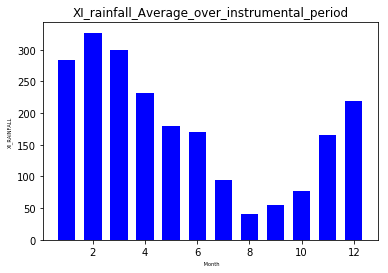

In [152]:
plt.bar(ds_XI_rainfall_month_av.index,ds_XI_rainfall_month_av.Rainfall,width,color='blue')
plt.xlabel(' Month', fontsize=5)
plt.ylabel('XI_RAINFALL', fontsize=5)
plt.title('XI_rainfall_Average_over_instrumental_period')
plt.show()

## Downloading of the ERA SST and Rainfall information. 

- Download for 